# We will assess the 3C tremor wavefield polarisation with time for 5 seismometers.

**Based on: Eibl, E. P. S., Müller, D., Walter, T. R., Allahbakhshi, M., Jousset, P., Hersir, G. P., Dahm, T., (2021) Eruptive Cycle and Bubble Trap of Strokkur Geyser, Iceland, Journal of Geophysical Research: Solid Earth, 126, DOI: 10.1029/2020JB020769**


We import packages

In [1]:
import matplotlib.animation as animation
from obspy.core import read, UTCDateTime
import matplotlib.dates as mdates
from obspy import read_inventory
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib widget

We set paths

In [2]:
filename = "2018_Strokkur/VI.*"
datafolder = "2018_Strokkur/"
outputpath = "figure_output/"

We set station coordinates

In [3]:
stationlist = ["S1", "S2", "S3", "S4", "S5"]
Easting = [533814.8959, 533822.2077, 533826.0672, 533814.4101, 533826.5201]
Northing = [7132036.3130, 7132037.5280, 7132045.5080, 7132031.8781, 7132031.3270]
Elevation = [182.7, 182.853, 183.083, 182.389, 182.227]
StrokkurNorthing = [7132048, 7132048]
StrokkurEasting = [533820, 533820]
StrokkurElevation = [183.2, 172]

We define filter, projection and axis limits

In [4]:
prefilt = [0.05, 0.06, 170, 175]
fmin = 2
fmax = 9
ampl_lim = 0.0000013

We define a function to read in seismic data

In [5]:
def read_data(tstart, tend, tstart_early, tend_late, fmin, fmax):
    '''
    function to read in seismic data and trim them to two different lenghts
    param tstart: start time of time window to be trimmed to
    type tstart: UTCDateTime object
    param tend: end time of time window to be trimmed to
    type tend: UTCDateTime object
    param tstart_early: start time of extended time window
    type tstart_early: UTCDateTime object
    param tend_late: end time of extended time window
    type tend_late: UTCDateTime object
    param fmin: lower corner of filter
    type fmin: float
    param fmax: upper corner of filter
    type fmax: float
    '''

    # We read in the seismic data 
    st = read(filename, starttime=tstart_early, endtime=tend_late)

    # we do further preprocessing 
    #print(st)
    st.detrend("demean")
    st.detrend("linear")
    st.taper(max_percentage=0.07, type="cosine")
    st.taper(max_percentage=0.07, type="cosine")

    # we remove the instrument response using a stationxml file
    for tr in st:
        inv = read_inventory(datafolder + "Stations_S.xml")
        pre_filt = [prefilt[0], prefilt[1], prefilt[2], prefilt[3]]
        tr.remove_response(inventory=inv, pre_filt=pre_filt, output="VEL")

    # we do further preprocessing 
    st.detrend("demean")
    st.detrend("linear")
    st.taper(max_percentage=0.01, type="cosine")
    st.filter("bandpass", freqmin=fmin, freqmax=fmax, corners=2, zerophase=True)

    # We save a copy of the not trimmed data for plotting
    st_notrim = st.copy()
    st.trim(tstart, tend)
    st.sort()

    return st, st_notrim


**Exercise 1.1: Please plot a seismogram of the trimmed and not trimmed data**

Step 1: Please plot the trimmed seismic data (black) above the not trimmed seismic data of one component (grey). We want to use the 'matplotlib' date format from 'obspy.core.trace.Trace.times' for the time axis.

Step 2: Please set the starttime tstart to 0:10:55.2 on 10 June 2018

Step 3: Please call the function that reads the data

Step 4: Please call the function that plots the data

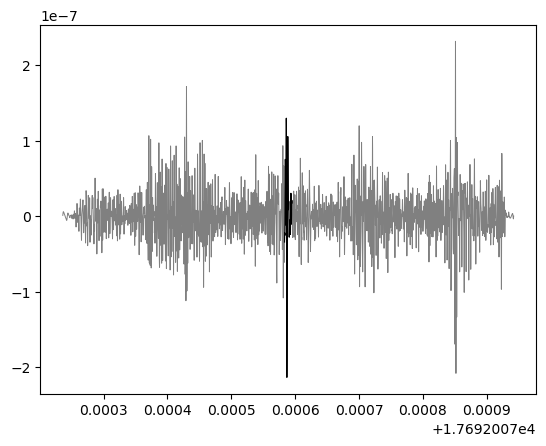

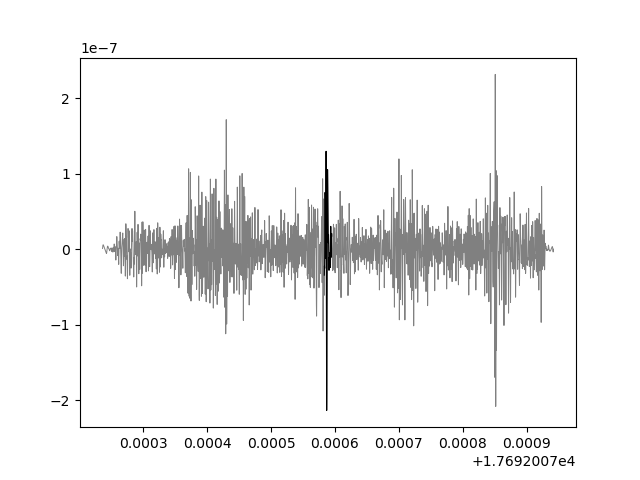

In [6]:
def plot_seismogram(axis, trace, trace_notrim):
    '''
    function to plot a seismogram
    param axis: figure axis to use for plotting 
    type axis: figure axis
    param trace: 1 component trimmed seismic data
    type trace: Obspy Trace object
    param trace_notrim: 1 component seismic data not trimmed (overlap with 'trace' needed)
    type trace_notrim: Obspy Trace object
    '''
    XX
    XX

tstart = XX
tend = tstart + 1
tstart_early = tstart - 1 * 30
tend_late = tend + 1 * 30

stream, stream_notrim = XX

fig, axis = plt.subplots()
XX
fig

**Exercise 1.2: Please write a function that plots one trace against another**

Step 1: Please write a function that plots one trace against another (2D).

Step 2: Please label the axes of your plot

Step 3: Please mark the startpoint of the time series

Step 4: Please plot the particle motion of E against N, Z against N and E against Z

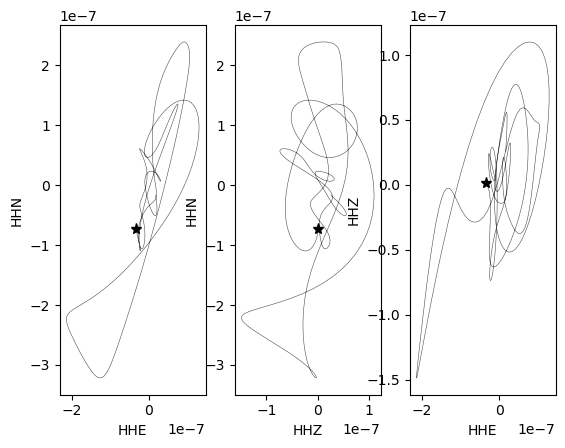

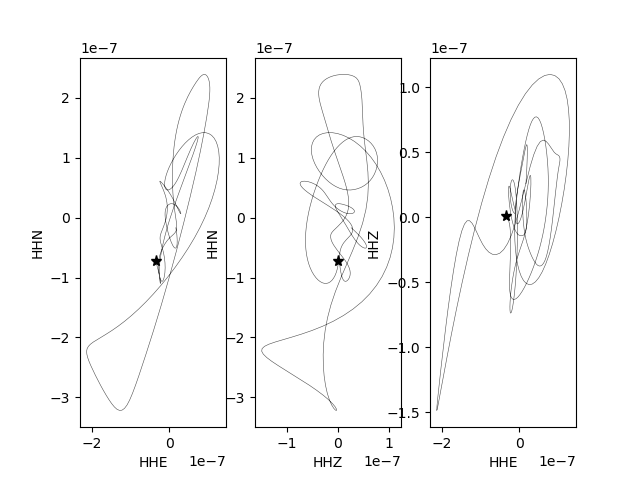

In [7]:
def plot_particle_motion_2D(axis, trace1, trace2):
    '''
    function to plot a subfigure in a particle motion figure
    param axis: figure axis to use for plotting 
    type axis: figure axis
    param trace1: 1 component trimmed seismic data
    type trace1: Obspy Trace object
    param trace2: 1 component trimmed seismic data of a different component
    type trace2: Obspy Trace object
    '''
    
    # we plot one trace against the other
    XX

    # we label the axes 
    XX
    XX

    # we mark the startpoint of the ground motion
    XX

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3)
XX
XX
XX
fig

**Exercise 1.3: Please write a function that plots three traces against each other**

Step 1: Please write a function that plots three traces against each other (3D) at a station location in space.

Step 2: Please mark the startpoint of the time series

Hint: use e.g. the Easting of a certain station location and add the ground motion recorded on the E component to it (please multiply the ground motion by 10**7 to make it visible) 

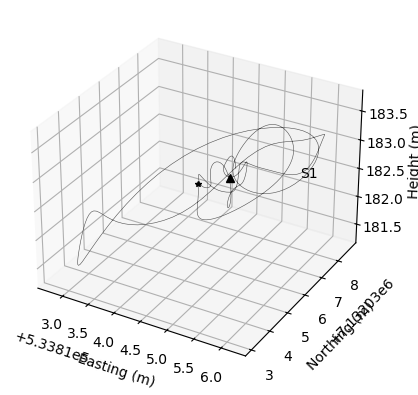

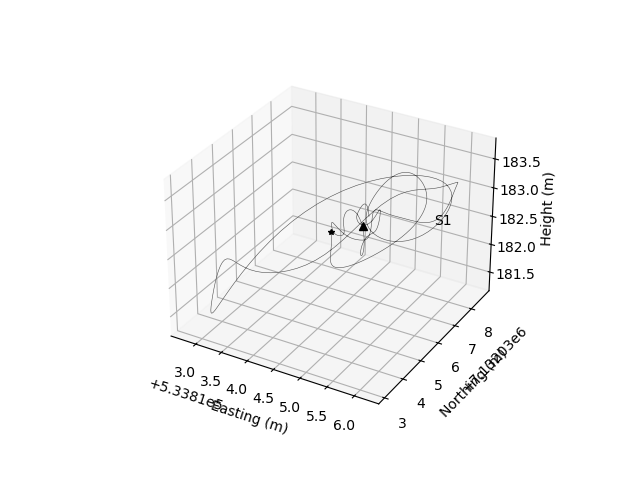

In [8]:
def plot_particle_motion_3D(axis, stream, Easting, Northing, Elevation):
    '''
    function to plot a the particle motion in 3D at the location of the seismometers.
    param axis: figure axis to use for plotting 
    type axis: figure axis
    param stream: 3C seismometer stream
    type stream: Obspy Stream object
    param Easting: Easting of one station location
    type Easting: float
    param Northing: Northing of one station location
    type Northing: float
    param Elevation: Elevation of one station location
    type Elevation: float
    '''

    # we plot three traces against the other
    XX
    # we mark the startpoint of the ground motion
    XX
    
    # we mark and label the stations
    axis.plot([Easting], [Northing], [Elevation], "k^", markersize=6)
    axis.text(
        Easting + 1,
        Northing + 1,
        Elevation,
        stream[1].stats.station,
    )

    axis.set_ylabel("Northing (m)")
    axis.set_xlabel("Easting (m)")
    axis.set_zlabel("Height (m)")

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
plot_particle_motion_3D(ax, stream.select(station = stationlist[0]), Easting[0], Northing[0], Elevation[0])
fig

We initialise the full animated figure. 

In [10]:
#%matplotlib notebook
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()

dimension = "3D"
#fig = plt.figure()

if (dimension == "2D"):
    fig = plt.figure()
elif (dimension == "3D"):
    fig = plt.figure()
    #fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

def animate(frame):
    '''
    function to animate a figure.
    param frame: number of frames to be processed for the video, one frame equals
                 a 1s time window here 
    type frame: int
    '''
    plt.clf()
    ii = frame

    # we use 'UTCDateTime' to set tstart to 0:10:55.2 on 10 June 2018. Note that tstart increases by 1 s in each iteration.  
    tstart = UTCDateTime(2018, 6, 10, 0, 10, 55.2) + ii * 1

    # we define the endtime so that the time window is 1 s long.
    tend = tstart + 1

    # we define a wider time window for the plotting
    tstart_early = tstart - 1 * 30
    tend_late = tend + 1 * 30

    st, st_notrim = read_data(tstart, tend, tstart_early, tend_late, fmin, fmax)

    if dimension == "2D":
        # we plot the waveforms
        ax0 = plt.subplot(4, 1, 1)
        plot_seismogram(ax0, st[0], st_notrim[0])
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
        plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=10))

        # we want to plot data from 3 seismometers
        for i in range(3):
            # we initialise the subfigures 
            ax1 = plt.subplot(4, 3, 3 * i + 4)
            ax2 = plt.subplot(4, 3, 3 * i + 5)
            ax3 = plt.subplot(4, 3, 3 * i + 6)

            # we plot the E component (x) against the N component (y)
            plot_particle_motion_2D(ax1, st[3 * i + 0], st[3 * i + 1])

            # we plot the Z component (x) against the N component (y)
            plot_particle_motion_2D(ax2, st[3 * i + 2], st[3 * i + 1])

            # we plot the E component (x) against the Z component (y)
            plot_particle_motion_2D(ax3, st[3 * i + 0], st[3 * i + 2])

            # we do some axes formatting
            ax1.yaxis.get_major_formatter().set_powerlimits([-2, 2])
            ax1.xaxis.get_major_formatter().set_powerlimits([-2, 2])
            ax1.text(0.0000006, 0.0000006, st[3 * i + 1].stats.station)
            ax1.set_xlim([-ampl_lim, ampl_lim])
            ax1.set_ylim([-ampl_lim, ampl_lim])
            ax2.yaxis.get_major_formatter().set_powerlimits([-2, 2])
            ax2.xaxis.get_major_formatter().set_powerlimits([-2, 2])
            ax2.text(0.0000006, 0.0000006, st[3 * i + 1].stats.station)
            ax2.set_xlim([-ampl_lim, ampl_lim])
            ax2.set_ylim([-ampl_lim, ampl_lim])
            ax3.yaxis.get_major_formatter().set_powerlimits([-2, 2])
            ax3.xaxis.get_major_formatter().set_powerlimits([-2, 2])
            ax3.text(0.0000006, 0.0000006, st[3 * i + 1].stats.station)
            ax3.set_xlim([-ampl_lim, ampl_lim])
            ax3.set_ylim([-ampl_lim, ampl_lim])

    elif dimension == "3D":
        #fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))
        #ax = plt.gca(projection="3d")
        ax = fig.add_subplot(111, projection='3d')
        #ax.view_init(azim=-90, elev=90) # topview
        fig.suptitle("Start: {}, End: {}".format(st[0].stats.starttime, st[0].stats.endtime))
        for i in range(len(stationlist)):
            # we plot the particle motion in 3D
            plot_particle_motion_3D(ax, st.select(station = stationlist[i]), Easting[i], Northing[i], Elevation[i])

            # we plot the conduit of Strokkur in 3D
            ax.plot(StrokkurEasting, StrokkurNorthing, StrokkurElevation, "b--")

            # we format and label the axes
            ax.yaxis.get_major_formatter().set_powerlimits([-2, 2])
            ax.xaxis.get_major_formatter().set_powerlimits([-2, 2])
            ax.set_ylabel("Northing (m)")
            ax.set_xlabel("Easting (m)")
            ax.set_zlabel("Height (m)")

# we create the animation here. If you increase the frames, a longer batch of the
# seismic data will be processed as 1 frame equals a 1 second seismic window.
anim = animation.FuncAnimation(fig, animate, frames=10, interval=1000, blit=False)
anim

# saving to m4 using ffmpeg writer
#print("Saving video")
#writervideo = animation.FFMpegWriter(fps=10)
#anim.save(outputpath + "Geyser_tremor_" + dimension + "..mp4", writer=writervideo)
#plt.close()
